In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_json('../09_Uni/Data_Uni.json')
df.sort_index(inplace=True)
df

,apDegree,bachelorsAvg,country,engExamAnlt,engExamQuan,engExamResult,engExamType,engExamVrbl,extra,field,...,fundType,masterAvg,papersGLOB,papersIRAN,uniAccepted,uniBachelors,uniMasters,uniRejected,uniSelected,year
2,Doctorate,17.74,انگلستان,n/a,n/a,n/a,n/a,n/a,Award is in GBP.The amount is for living stipe...,Petroleum Engineering,...,Award,n/a,4,8,n/a,آزاد اسلامی امیدیه,n/a,n/a,"heriot watt university, edinburgh",2007
3,Doctorate,15.70,آمریکا,3,760,100,iBT,330,سال 2008 اومدم آمریکا و دو سال master رو در دا...,Civil Engineering / Transportation,...,RA,19,8,10,"epfl switzerland, northwestern",فردوسی مشهد,portland state university,"uc berkeley, georgia tech",northwestern,2010
5,Doctorate,17.68,آمریکا,3.5,800,100,iBT,320,تاريخ مصاحبه: 6 مي 2008 و تاريخ کلير شدن: 16 م...,(Management ( Operations Management,...,TA/RA,18.04,4,4,n/a,اميرکبير,شريف,"virginia tech, insead, mit sloan,cornegie mell...",cornell,2008
6,Masters,16.00,سوئد,3,800,92,iBT,310,رشته لیسانس من مهندسی مکانیک بود. فاند Dalhous...,Nanotechnology,...,n/a,n/a,0,0,"dalhousie, clemson, tudelft, ntu-nus (singa sc...",صنعتی امیرکبیر,n/a,"uc berkeley, uc davis, carneigie mellon",chalmers,2008
7,Masters,7.67,اسپانیا,n/a,n/a,103,iBT,n/a,رشته ی لیسانس ام مهندسی برق بوده./ ساپورت مالی...,Business Administration and Quantitative Methods,...,TA,n/a,0,0,"carlos iii madrid, fhtw berlin, chalmers, poli...",پلی تکنیک بخارست، رومانی - معدل 7.67 از 10,n/a,chalmers,"carlos iii madrid, spain",2008
8,Masters,16.00,استرالیا,n/a,n/a,6.5,IELTS,n/a,n/a,MBAA,...,n/a,15,0,0,unisa - university of adelaide,صنعتی اصفهان,تهران,n/a,university of adelaide,2009
9,Masters,17.40,آمریکا,n/a,n/a,107,iBT,n/a,در دانشگاه كلمبيا در مقطع دكتري رد شدم. در ساي...,Middle Eastern Studies/Sociology,...,TA,17.02,1,0,"nyu, vcu, new school",اصفهان,علامه طباطبايي,columbia,nyu,2008
10,Doctorate,16.51,کانادا,4.5,760,7.5,IELTS,320,southampton: فاند معادل 12940 پوند براِ هزينه ...,Electrical Engineering,...,Award,18.83,11,1,"university of new south wales, the university ...",امير کبير,امير کبير,"epfl,maryland,mcgill,waterloo,new mexico",mcmaster,2008
12,Masters,17.18,آمریکا,3.5,700,603,PBT,380,رشته تاریخ هنر در Connecticut با TA/Gallery Po...,"Fine Arts,Ceramics",...,TA,16.9,0,2,"texas tech u, u connecticut, asu, suny bingham...",دانشگاه هنر,دانشگاه هنر,"osu,case western,oregon",ttu,2007
13,Doctorate,15.57,کانادا,3.5,800,110,iBT,370,"Calgary: PhD in Computer Science, Full Fund (T...",Computer Science,...,TA/RA,16.27,0,1,"calgary, carleton",شریف,شریف,"ucsb, texas a&amp;amp;m, alberta, waterloo",calgary,2008


In [16]:
df['country'].value_counts()

آمریکا       1137
کانادا        593
n/a           536
آلمان         234
استرالیا      185
سوئد          161
ایتالیا       146
فنلاند         68
انگلستان       68
مالزی          65
ترکیه          44
هلند           43
نروژ           41
بلژیک          35
فرانسه         33
نیوزلند        29
سوئیس          28
اسپانیا        24
سنگاپور        17
اتریش          17
چین             8
هند             7
روسیه           3
ژاپن            2
جمهوری چک       2
Name: country, dtype: int64

In [17]:
df['country']=df['country'].replace({u"آمریکا":"US",u"کانادا":"Canada",u"آلمان":"Germany",u"استرالیا":"Australia",u"سوئد":"Sweden",u"ایتالیا":"Italy",u"مالزی":"Malaysia",u"فنلاند":"Finland",u"انگلستان":"England",u"هلند":"Netherlands",u"ترکیه":"Turkey",u"نروژ":"Norway",u"بلژیک":"Belgium",u"فرانسه":"France",u"اتریش":"Austria",u"نیوزلند":"New Zealand",u"سوئیس":"Swaziland",u"اسپانیا":"Spain",u"سنگاپور":"Singapore",u"هند":"India",u"چین":"China",u"روسیه":"Russia",u"جمهوری چک":"Czech Republic",u"ژاپن":"Japan"})

In [18]:
df['country'].value_counts()

US                1137
Canada             593
n/a                536
Germany            234
Australia          185
Sweden             161
Italy              146
England             68
Finland             68
Malaysia            65
Turkey              44
Netherlands         43
Norway              41
Belgium             35
France              33
New Zealand         29
Swaziland           28
Spain               24
Singapore           17
Austria             17
China                8
India                7
Russia               3
Czech Republic       2
Japan                2
Name: country, dtype: int64

### We have 536 missing data (about 15% of our data)

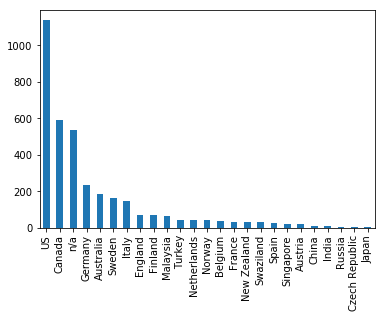

In [19]:
df['country'].value_counts().plot(kind='bar')
plt.show()

In [20]:
nac=df[(df['country']=='n/a') & ((df['uniAccepted']!='n/a') | (df['uniSelected']!='n/a'))][['uniAccepted','uniSelected','country']].copy()
nac.head(3)

,uniAccepted,uniSelected,country
22,ntnu,n/a,n/a
29,"caltec(no fund),ucla, northwestern, mcgill,ubc...",n/a,n/a
37,auburn,n/a,n/a


In [21]:
# ['unknown','no one','\-+','not yet','not decided yet','i have not decided yet','waiting','still working on it']

## People with GRE muslty admitted in US Universities

In [22]:
noCountryWithGre=df[(df['country']=='n/a')&(df['uniSelected']!='n/a')&((df['engExamQuan']!='n/a')|(df['engExamAnlt']!='n/a')|(df['engExamVrbl']!='n/a'))][['country','uniSelected',"engExamQuan","engExamAnlt","engExamVrbl"]]
noCountryWithGre.count()[1]

45

In [23]:
# for i in noCountryWithGre.index:
#     print(i)
#     print(df.get_value(i,'apUni'))
#     a = (raw_input()).strip()
#     if (a=='STOP'): break;
#     df.set_value(i,'country',a)

In [24]:
# noCountryWithGre=df[(df['country']=='n/a')]
# noCountryWithGre.count()[0]

In [25]:
df.to_json('Fix1.json',date_format='utf8')

# Nothing really changed + beside Translating Country names